In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
from scipy import stats
from scipy.stats import norm, skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNetCV
from sklearn import svm
from lightgbm import LGBMRegressor

In [2]:
import datetime as dt

In [3]:
big_df =  pd.read_csv('input/data_new.csv')
#test_df=pd.read_excel('Test_set.xlsx')

In [0]:
#big_df = train_df.append(test_df)

In [4]:
big_df.dtypes

Origin            object
Destination       object
Dept_Date         object
Dept_Time         object
Arr_Time          object
Total_Fare       float64
Base_Fare        float64
Fuel_Fare        float64
Airways           object
Available        float64
Duration          object
Class_Type        object
Flight Number     object
Flight Code       object
FlightID          object
Hopping           object
Taken             object
dtype: object

In [0]:
big_df['Date'] = big_df['Dept_Date'].str.split('/').str[0]
big_df['Month'] = big_df['Dept_Date'].str.split('/').str[1]
big_df['Year'] = big_df['Dept_Date'].str.split('/').str[2]

In [0]:
big_df["Dept_Date"] = big_df["Dept_Date"].apply(pd.to_datetime)

In [0]:
def weekDay(dayVal):
    day, month, year = (int(x) for x in dayVal.split('-'))    
    ans = dt.date(year, month, day).strftime("%a")
    return ans

In [0]:
big_df['Taken_Day'] = big_df['Taken'].apply(weekDay)

In [0]:
big_df["Taken"] = big_df["Taken"].apply(pd.to_datetime)

In [0]:
big_df['Days_To_Dept'] = (big_df['Dept_Date'] - big_df['Taken']).dt.days

In [0]:
big_df=big_df.drop(['Dept_Date'], axis=1)

In [0]:
big_df=big_df.drop(['Taken'], axis=1)

In [0]:
big_df['Date'] = big_df['Date'].astype(int)
big_df['Month'] = big_df['Month'].astype(int)
big_df['Year'] = big_df['Year'].astype(int)

In [19]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51734 entries, 0 to 51733
Data columns (total 20 columns):
Origin           51734 non-null object
Destination      51734 non-null object
Dept_Time        51719 non-null object
Arr_Time         51719 non-null object
Total_Fare       51719 non-null float64
Base_Fare        51719 non-null float64
Fuel_Fare        51719 non-null float64
Airways          51719 non-null object
Available        51719 non-null float64
Duration         51719 non-null object
Class_Type       51719 non-null object
Flight Number    51719 non-null object
Flight Code      51719 non-null object
FlightID         51719 non-null object
Hopping          51719 non-null object
Date             51734 non-null int64
Month            51734 non-null int64
Year             51734 non-null int64
Taken_Day        51734 non-null object
Days_To_Dept     51734 non-null int64
dtypes: float64(4), int64(4), object(12)
memory usage: 7.9+ MB


In [0]:
big_df['Arrival_Hour'] = big_df['Arr_Time'] .str.split(':').str[0]
big_df['Arrival_Minute'] = big_df['Arr_Time'] .str.split(':').str[1]
big_df['Arrival_Hour'] = pd.to_numeric(big_df['Arrival_Hour'], errors='coerce')
big_df= big_df.dropna(subset=['Arrival_Hour'])


In [0]:
big_df['Arrival_Hour'] = big_df['Arrival_Hour'].astype(int)
big_df['Arrival_Minute'] = big_df['Arrival_Minute'].astype(int)
big_df=big_df.drop(['Arr_Time'], axis=1)

In [0]:
big_df['Dep_Hour'] = big_df['Dept_Time'] .str.split(':').str[0]
big_df['Dep_Minute'] = big_df['Dept_Time'] .str.split(':').str[1]
big_df['Dep_Hour'] = pd.to_numeric(big_df['Dep_Hour'], errors='coerce')
big_df= big_df.dropna(subset=['Dep_Hour'])
big_df['Dep_Hour'] = big_df['Dep_Hour'].astype(int)
big_df['Dep_Minute'] = big_df['Dep_Minute'].astype(int)

In [0]:
big_df=big_df.drop(['Dept_Time'], axis=1)
#big_df['Dep_Hour'] = big_df['Dep_Hour'].astype(int)
#big_df['Dep_Minute'] = big_df['Dep_Minute'].astype(int)
#big_df=big_df.drop(['Dep_Time'], axis=1)


# In[94]:


#big_df['Route_1'] = big_df['Route'] .str.split('→ ').str[0]
#big_df['Route_2'] = big_df['Route'] .str.split('→ ').str[1]
#big_df['Route_3'] = big_df['Route'] .str.split('→ ').str[2]
#big_df['Route_4'] = big_df['Route'] .str.split('→ ').str[3]
#big_df['Route_5'] = big_df['Route'] .str.split('→ ').str[4]

In [0]:
big_df['Total_Fare'].fillna((big_df['Total_Fare'].mean()), inplace=True)


# In[96]:


#big_df['Route_1'].fillna("None",inplace = True)
#big_df['Route_2'].fillna("None",inplace = True)
#big_df['Route_3'].fillna("None",inplace = True)
#big_df['Route_4'].fillna("None",inplace = True)
#big_df['Route_5'].fillna("None",inplace = True)

In [25]:
big_df.describe()

,Total_Fare,Base_Fare,Fuel_Fare,Available,Date,Month,Year,Days_To_Dept,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute
count,51719.000000,51719.000000,51719.000000,51719.000000,51719.000000,51719.000000,51719.000000,51719.000000,51719.000000,51719.000000,51719.000000,51719.000000
mean,7910.773739,6212.169493,1280.208589,8.921847,6.578143,15.838783,2018.490207,45.286529,11.642259,29.856339,11.214583,27.837545
std,4069.358744,3648.616760,847.002890,10.725873,5.205406,8.916634,0.499909,26.229297,6.399377,15.445411,6.134450,19.501057
min,3211.000000,1530.000000,218.000000,1.000000,1.000000,1.000000,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5223.000000,3800.000000,481.000000,5.000000,1.000000,8.000000,2018.000000,23.000000,8.000000,20.000000,6.000000,10.000000
50%,7009.000000,5350.000000,860.000000,7.000000,11.000000,16.000000,2018.000000,46.000000,10.000000,30.000000,9.000000,30.000000
75%,9355.000000,7550.000000,2171.000000,9.000000,12.000000,23.000000,2019.000000,68.000000,17.000000,45.000000,17.000000,45.000000
max,54826.000000,49906.000000,4398.000000,112.000000,12.000000,31.000000,2019.000000,92.000000,23.000000,55.000000,23.000000,55.000000


In [0]:
#big_df=big_df.drop(['Route'], axis=1)
#big_df=big_df.drop(['Duration'], axis=1)
#big_df.info()

import re
def convertToDecimal(value):
    h, m = re.sub("\D"," ",value).split()
    return int(h)*60+int(m)

In [0]:
big_df.loc[:,'Duration'] = big_df.loc[:,'Duration'].apply(convertToDecimal)

In [0]:
#big_df['Session'] = pd.cut(big_df.Dep_Hour,[0,6,12,18,24],labels=['Night','Morning','Afternoon','Evening'])
def assign_session(val):
    if val > 0.0 and val <= 6.0:
        return 'Night'
    elif val > 6.0 and val <= 12.0:
        return 'Morning'
    elif val > 12.0 and val <= 18.0:
        return 'Afternoon'
    else:
        return 'Evening'

In [0]:
big_df['Session'] = big_df['Dep_Hour'].apply(assign_session)

In [30]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51719 entries, 0 to 51733
Data columns (total 23 columns):
Origin            51719 non-null object
Destination       51719 non-null object
Total_Fare        51719 non-null float64
Base_Fare         51719 non-null float64
Fuel_Fare         51719 non-null float64
Airways           51719 non-null object
Available         51719 non-null float64
Duration          51719 non-null int64
Class_Type        51719 non-null object
Flight Number     51719 non-null object
Flight Code       51719 non-null object
FlightID          51719 non-null object
Hopping           51719 non-null object
Date              51719 non-null int64
Month             51719 non-null int64
Year              51719 non-null int64
Taken_Day         51719 non-null object
Days_To_Dept      51719 non-null int64
Arrival_Hour      51719 non-null int64
Arrival_Minute    51719 non-null int64
Dep_Hour          51719 non-null int64
Dep_Minute        51719 non-null int64
Session         

In [0]:
#big_df.head()

In [0]:
big_df.loc[:,'FlightGroup'] =big_df.loc[:,['Airways','Session']].astype(str).apply('_'.join,1)

In [0]:
from sklearn.preprocessing import LabelEncoder

lb_encode = LabelEncoder()
big_df["Hopping"] = lb_encode.fit_transform(big_df["Hopping"])
big_df["Airways"] = lb_encode.fit_transform(big_df["Airways"])
big_df["Destination"] = lb_encode.fit_transform(big_df["Destination"])
big_df["Origin"] = lb_encode.fit_transform(big_df["Origin"])
big_df["Session"] = lb_encode.fit_transform(big_df["Session"])
big_df["FlightGroup"] = lb_encode.fit_transform(big_df["FlightGroup"])
#big_df['Route_1']= lb_encode.fit_transform(big_df["Route_1"])
#big_df['Route_2']= lb_encode.fit_transform(big_df["Route_2"])
#big_df['Route_3']= lb_encode.fit_transform(big_df["Route_3"])
#big_df['Route_4']= lb_encode.fit_transform(big_df["Route_4"])
#big_df['Route_5']= lb_encode.fit_transform(big_df["Route_5"])

In [0]:
#big_df = big_df.drop(['Session'],axis=1)
big_df["Taken_Day"] = lb_encode.fit_transform(big_df["Taken_Day"])

In [35]:
big_df.head()

,Origin,Destination,Total_Fare,Base_Fare,Fuel_Fare,Airways,Available,Duration,Class_Type,Flight Number,...,Month,Year,Taken_Day,Days_To_Dept,Arrival_Hour,Arrival_Minute,Dep_Hour,Dep_Minute,Session,FlightGroup
0,0,7,7517.0,6450.0,796.0,2,1.0,170,Economy,2484,...,13,2018,4,0,2,20,23,30,1,7
1,0,7,7806.0,7025.0,460.0,4,9.0,175,Economy,192,...,13,2018,4,0,12,30,9,35,2,19
2,0,7,7888.0,6755.0,862.0,2,13.0,285,Economy,427_ 202,...,13,2018,4,0,21,35,16,50,0,6
3,0,7,8009.0,7195.0,661.0,1,11.0,165,Economy,722,...,13,2018,4,0,2,10,23,25,1,4
4,0,7,8041.0,6950.0,820.0,2,3.0,165,Economy,2988,...,13,2018,4,0,19,45,17,0,0,6


In [0]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns  

In [37]:
missing_values_table(big_df)

Your selected dataframe has 24 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [38]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51719 entries, 0 to 51733
Data columns (total 24 columns):
Origin            51719 non-null int64
Destination       51719 non-null int64
Total_Fare        51719 non-null float64
Base_Fare         51719 non-null float64
Fuel_Fare         51719 non-null float64
Airways           51719 non-null int64
Available         51719 non-null float64
Duration          51719 non-null int64
Class_Type        51719 non-null object
Flight Number     51719 non-null object
Flight Code       51719 non-null object
FlightID          51719 non-null object
Hopping           51719 non-null int64
Date              51719 non-null int64
Month             51719 non-null int64
Year              51719 non-null int64
Taken_Day         51719 non-null int64
Days_To_Dept      51719 non-null int64
Arrival_Hour      51719 non-null int64
Arrival_Minute    51719 non-null int64
Dep_Hour          51719 non-null int64
Dep_Minute        51719 non-null int64
Session           517

In [0]:
big_df.drop(columns=['Base_Fare','Fuel_Fare'],axis=1,inplace=True)

In [40]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51719 entries, 0 to 51733
Data columns (total 22 columns):
Origin            51719 non-null int64
Destination       51719 non-null int64
Total_Fare        51719 non-null float64
Airways           51719 non-null int64
Available         51719 non-null float64
Duration          51719 non-null int64
Class_Type        51719 non-null object
Flight Number     51719 non-null object
Flight Code       51719 non-null object
FlightID          51719 non-null object
Hopping           51719 non-null int64
Date              51719 non-null int64
Month             51719 non-null int64
Year              51719 non-null int64
Taken_Day         51719 non-null int64
Days_To_Dept      51719 non-null int64
Arrival_Hour      51719 non-null int64
Arrival_Minute    51719 non-null int64
Dep_Hour          51719 non-null int64
Dep_Minute        51719 non-null int64
Session           51719 non-null int64
FlightGroup       51719 non-null int64
dtypes: float64(2), int64

In [41]:
df_train = big_df[0:10683]
df_test = big_df[10683:]
df_test = df_test.drop(['Total_Fare'], axis =1)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10683 entries, 0 to 10683
Data columns (total 22 columns):
Origin            10683 non-null int64
Destination       10683 non-null int64
Total_Fare        10683 non-null float64
Airways           10683 non-null int64
Available         10683 non-null float64
Duration          10683 non-null int64
Class_Type        10683 non-null object
Flight Number     10683 non-null object
Flight Code       10683 non-null object
FlightID          10683 non-null object
Hopping           10683 non-null int64
Date              10683 non-null int64
Month             10683 non-null int64
Year              10683 non-null int64
Taken_Day         10683 non-null int64
Days_To_Dept      10683 non-null int64
Arrival_Hour      10683 non-null int64
Arrival_Minute    10683 non-null int64
Dep_Hour          10683 non-null int64
Dep_Minute        10683 non-null int64
Session           10683 non-null int64
FlightGroup       10683 non-null int64
dtypes: float64(2), int64

In [0]:
X = df_train.drop(axis=1,columns=['Class_Type','Flight Number','Flight Code','FlightID'])
y = df_train.Total_Fare

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [0]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "http://i.imgur.com/QBuDOjs.jpg")

In [44]:
df_train.drop(axis=1,columns=['Class_Type','Flight Number','Flight Code','FlightID'],inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [45]:
# # LINEAR REGRESSION

# In[55]:


#Build our model method
lm = LinearRegression()


# In[119]:


#Build our cross validation method
kfolds = KFold(n_splits=50,shuffle=True, random_state=100)


# In[120]:


def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X, y, 
                                   scoring="neg_mean_squared_error", 
                                   cv = kfolds))
    return(rmse)


# In[121]:


benchmark_model = make_pipeline(RobustScaler(),
                                lm).fit(X=X_train, y=y_train)
cv_rmse(benchmark_model).mean()

5.9938736660913136e-12

In [0]:
from sklearn.linear_model import RidgeCV

def ridge_selector(k):
    ridge_model = make_pipeline(RobustScaler(),
                                RidgeCV(alphas = [k],
                                        cv=kfolds)).fit(X_train, y_train)
    
    ridge_rmse = cv_rmse(ridge_model).mean()
    return(ridge_rmse)


# In[123]:


r_alphas = [.0001, .0003, .0005, .0007, .0009, 
          .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

ridge_scores = []
for alpha in r_alphas:
    score = ridge_selector(alpha)
    ridge_scores.append(score)

Text(0, 0.5, 'score')

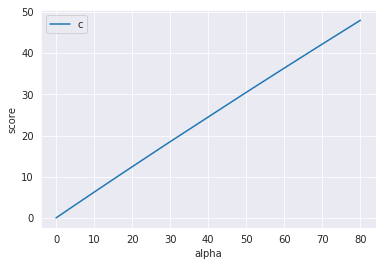

In [47]:
plt.plot(r_alphas, ridge_scores, label='Ridge')
plt.legend('center')
plt.xlabel('alpha')
plt.ylabel('score')

In [48]:
ridge_score_table = pd.DataFrame(ridge_scores, r_alphas, columns=['RMSE'])
ridge_score_table

,RMSE
0.0001,0.000064
0.0003,0.000190
0.0005,0.000317
0.0007,0.000443
0.0009,0.000569
0.0100,0.006293
0.0500,0.031455
0.1000,0.062907
0.3000,0.188693
1.0000,0.628666


In [49]:
alphas_alt = [14.5, 14.6, 14.7, 14.8, 14.9, 15, 15.1, 15.2, 15.3, 15.4, 15.5]

ridge_model2 = make_pipeline(RobustScaler(),
                            RidgeCV(alphas = alphas_alt,
                                    cv=kfolds)).fit(X_train, y_train)

cv_rmse(ridge_model2).mean()

9.032891519827787

In [0]:
# # Lasso Regression

# In[125]:


alphas = [0.00005, 0.0001, 0.0003, 0.0005, 0.0007, 
          0.0009, 0.01]
alphas2 = [0.00005, 0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
           0.0006, 0.0007, 0.0008]

In [51]:
lasso_model2 = make_pipeline(RobustScaler(),
                             LassoCV(max_iter=1e7,
                                    alphas = alphas2,
                                    random_state = 42)).fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


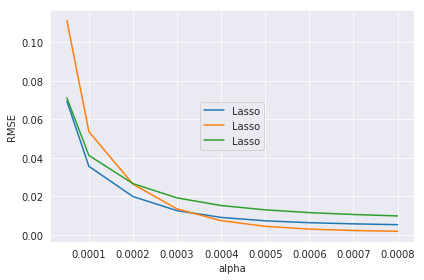

In [52]:
scores = lasso_model2.steps[1][1].mse_path_

plt.plot(alphas2, scores, label='Lasso')
plt.legend(loc='center')
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.tight_layout()
plt.show()

In [53]:
cv_rmse(lasso_model2).mean()

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The defaul

0.30268969135515517

In [54]:
e_alphas = [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.0006, 0.0007]
e_l1ratio = [0.8, 0.85, 0.9, 0.95, 0.99, 1]

elastic_cv = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

elastic_model3 = elastic_cv.fit(X_train, y_train)


# In[128]:


cv_rmse(elastic_model3).mean()

0.30238144230132846

In [6]:
import xgboost as xgb
from xgboost import XGBRegressor

ModuleNotFoundError: No module named 'xgboost'

In [0]:
from sklearn.model_selection import GridSearchCV
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4
get_ipython().run_line_magic('matplotlib', 'inline')
import xgboost as xgb
from xgboost import XGBRegressor

In [0]:
def modelfit(alg, dtrain, target, useTrainCV=True, 
             cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain.values, 
                              label=y.values)
        
        print("\nGetting Cross-validation result..")
        cvresult = xgb.cv(xgb_param, xgtrain, 
                          num_boost_round=alg.get_params()['n_estimators'], 
                          nfold=cv_folds,metrics='rmse', 
                          early_stopping_rounds=early_stopping_rounds,
                          verbose_eval = True)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    print("\nFitting algorithm to data...")
    alg.fit(dtrain, target, eval_metric='rmse')
        
    #Predict training set:
    print("\nPredicting from training data...")
    dtrain_predictions = alg.predict(dtrain)
        
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(mean_squared_error(target.values,
                                             dtrain_predictions)))

In [57]:
xgb3 = XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=10,
                     min_child_weight=5 ,gamma=0, subsample=0.7,max_bin=20,
                     colsample_bytree=0.8,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006)

xgb_fit = xgb3.fit(X_train, y_train)


# In[203]:


cv_rmse(xgb_fit).mean()

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/usr/local/lib/python3.6/dist-packages/x

172.6458142566444

from sklearn import svm
svr_opt = svm.SVR(C = 100000, gamma = 1e-08)

svr_fit = svr_opt.fit(X_train, y_train)


# In[174]:


cv_rmse(svr_fit).mean()

In [9]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline

In [58]:
from lightgbm import LGBMRegressor

lgbm_model = LGBMRegressor(objective='regression',num_leaves=31,
                              learning_rate=0.1, n_estimators=200,
                              max_bin = 100, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.8,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =20, min_sum_hessian_in_leaf = 11)
lgbm_fit = lgbm_model.fit(X_train, y_train)


# In[198]:


cv_rmse(lgbm_fit).mean()

267.6229745126053

In [0]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.pipeline import make_pipeline

#setup models
ridge = make_pipeline(RobustScaler(), 
                      RidgeCV(alphas = alphas_alt, cv=kfolds))

lasso = make_pipeline(RobustScaler(),
                      LassoCV(max_iter=1e7, alphas = alphas2,
                              random_state = 42, cv=kfolds))

elasticnet = make_pipeline(RobustScaler(), 
                           ElasticNetCV(max_iter=1e7, alphas=e_alphas, 
                                        cv=kfolds, l1_ratio=e_l1ratio))

lightgbm = make_pipeline(RobustScaler(),
                        LGBMRegressor(objective='regression',num_leaves=31,
                              learning_rate=0.1, n_estimators=200,
                              max_bin = 100, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.8,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11))


xgboost = make_pipeline(RobustScaler(),
                        XGBRegressor(learning_rate =0.1, n_estimators=200, max_depth=10,
                     min_child_weight=5 ,gamma=0, subsample=0.7,
                     colsample_bytree=0.8,objective= 'reg:linear',
                     nthread=4,scale_pos_weight=1,seed=27, reg_alpha=0.00006))
 

#stack
stack_gen = StackingCVRegressor(regressors=(ridge, lasso, elasticnet, 
                                            xgboost, lightgbm), 
                               meta_regressor=xgboost,
                               use_features_in_secondary=True)



#prepare dataframes
stackX = np.array(X_train)
stacky = np.array(y_train)

In [0]:
stack_gen_model = stack_gen.fit(stackX, stacky)

In [0]:
em_preds = elastic_model3.predict(X_test)
lasso_preds = lasso_model2.predict(X_test)
ridge_preds = ridge_model2.predict(X_test)
stack_gen_preds = stack_gen_model.predict(X_test)
xgb_preds = xgb_fit.predict(X_test)
#svr_preds = svr_fit.predict(X_test)
lgbm_preds = lgbm_fit.predict(X_test)

In [62]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = np.sqrt(mean_squared_error(y_test, stack_gen_preds))
print("RMSE: %f" % (rmse))

RMSE: 74.378886


In [63]:
abs_error = abs(stack_gen_preds - y_test)
print('Absolute Error',abs_error)
mabe = 100 * (abs_error / y_test)

Absolute Error 6041       1.079102
5637       1.645996
9644       0.004395
3159       0.035645
5278       0.547363
7354       7.808105
10183      0.049805
10297      0.270020
8316       0.080566
462        0.973633
2835       1.134766
7614       0.370117
6442       0.546875
5624       3.836426
7751       0.037109
5317       1.139648
2948       0.018555
2571       2.338867
1129       0.159668
9682       0.379883
5156       0.522949
4405      16.086914
2378       0.761719
8309       0.263184
3031       0.156250
3780       0.265625
9314       3.183105
2547       0.695068
1599       9.654297
8679       0.225586
            ...    
6327       0.128418
2675       0.330566
10220      1.149414
9837       0.906250
1479       1.230469
2109       1.706055
10051      0.469482
10591      1.909180
7379       0.403320
2069      18.625000
8420       0.158691
8231       1.856445
5365       0.416016
5261       2.687500
440      906.015625
5045       0.599609
2322       0.681885
582       25.561523
9572 

In [64]:
accuracy = 100 - np.mean(mabe)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 99.95 %.


In [79]:
testval = X_test.iloc[0].to_frame().T
print(testval)

      Origin  Destination  Total_Fare  Airways  Available  Duration  Hopping  \
6041     0.0          7.0      8483.0      0.0        7.0     170.0      0.0   

      Date  Month    Year  Taken_Day  Days_To_Dept  Arrival_Hour  \
6041   1.0    5.0  2019.0        4.0          53.0          16.0   

      Arrival_Minute  Dep_Hour  Dep_Minute  Session  FlightGroup  
6041            10.0      13.0        20.0      0.0          0.0  


In [80]:
stack_gen_model.predict(testval)

array([8484.079], dtype=float32)

In [67]:
from sklearn.metrics import r2_score
r2_score(y_test,stack_gen_preds)

0.9996019261452207

df_test_xgb = df_test[['Additional_Info', 'Airline', 'Destination', 'Source', 'Date', 'Month',
       'Year', 'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour',
       'Dep_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']]
preds_1 = stack_gen_model.predict(df_test_xgb)
df_test_xgb['Price'] = preds_1
df_test_xgb.to_csv('flight_price_5.csv')

C:\Users\CG9254\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


df_test_xgb = df_test[['Additional_Info', 'Airline', 'Destination', 'Source', 'Date', 'Month',
       'Year', 'Stop', 'Arrival_Hour', 'Arrival_Minute', 'Dep_Hour',
       'Dep_Minute', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5']]
preds_1 = xgb_fit.predict(df_test_xgb)
df_test_xgb['Price'] = preds_1
df_test_xgb.to_csv('flight_price_10.csv')